In [1]:
from helpers import *
from tqdm import notebook

In [2]:
def runsims(alpha = 0.95, num_sim=30, temp = 10, stopK = 0.000001, element="swap"):
    sim = AnnealTVS(df, K = temp, stopK = stopK, alpha = alpha, elementary=element, num_sim = num_sim)
    res = sim.run_sim()
    return res

def plot_solution(solution, df):
    df.plot.scatter("x", "y")
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        to = df.loc[solution[i+1]]
        plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])
    fro = df.loc[solution[len(solution)-1]]
    to = df.loc[solution[0]]
    plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])

In [17]:
def get_distance(x1, y1, x2, y2) :
    return np.sqrt((x1-x2)**2 + abs(y1-y2)**2)

def total_distance(solution, df):
    distance = 0
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        print(fro)
        to = df.loc[solution[i+1]]
        distance += get_distance(fro["x"], fro["y"], to["x"], to["y"])
        print(distance)
     # make it a circle
    fro = df.loc[solution[len(solution)-1]]
    to = df.loc[solution[0]]
    distance += get_distance(fro["x"], fro["y"], to["x"], to["y"])
    return distance

In [25]:
df = pd.read_csv("data/a280.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = r"[ ]{1,}", index_col=0).drop("EOF")
# df = pd.read_csv("data/a280.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = ' ', index_col=0).drop("EOF")

<ipython-input-25-f409b169b928>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("data/a280.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = r"[ ]{1,}", index_col=0).drop("EOF")


In [26]:
df.loc["1"]

x    288.0
y    149.0
Name: 1, dtype: float64

In [ ]:
sim = AnnealTVS(df, K = 10, num_sim=1,num_searches = 200,stopK = .1, alpha = 0.97, beta = 0.2, gamma = 0.5,
                elementary="2opt", verbose=True, alternate=True, secondary="insert")

In [19]:
total_distance(sim.solution,df)

x    260.0
y      NaN
Name: 250, dtype: float64
nan
x    288.0
y    149.0
Name: 1, dtype: float64
nan
x    280.0
y    133.0
Name: 280, dtype: float64
nan
x    288.0
y    129.0
Name: 2, dtype: float64
nan
x    270.0
y    133.0
Name: 3, dtype: float64
nan
x    260.0
y    129.0
Name: 279, dtype: float64
nan
x    252.0
y    125.0
Name: 278, dtype: float64
nan
x    256.0
y    141.0
Name: 4, dtype: float64
nan
x    246.0
y    141.0
Name: 277, dtype: float64
nan
x    236.0
y    145.0
Name: 276, dtype: float64
nan
x    228.0
y    145.0
Name: 275, dtype: float64
nan
x    220.0
y    145.0
Name: 274, dtype: float64
nan
x    212.0
y    145.0
Name: 273, dtype: float64
nan
x    204.0
y    145.0
Name: 272, dtype: float64
nan
x    196.0
y    145.0
Name: 271, dtype: float64
nan
x    188.0
y    145.0
Name: 16, dtype: float64
nan
x    172.0
y    145.0
Name: 17, dtype: float64
nan
x    164.0
y    145.0
Name: 18, dtype: float64
nan
x    156.0
y    145.0
Name: 19, dtype: float64
nan
x    148.0
y    145.0
Na

Name: 221, dtype: float64
nan
x    236.0
y      NaN
Name: 222, dtype: float64
nan
x    252.0
y      NaN
Name: 223, dtype: float64
nan
x    260.0
y      NaN
Name: 224, dtype: float64
nan
x    260.0
y      NaN
Name: 225, dtype: float64
nan
x    260.0
y      NaN
Name: 226, dtype: float64
nan
x    260.0
y      NaN
Name: 227, dtype: float64
nan
x    260.0
y      NaN
Name: 228, dtype: float64
nan
x    260.0
y      NaN
Name: 229, dtype: float64
nan
x    260.0
y      NaN
Name: 230, dtype: float64
nan
x    276.0
y      NaN
Name: 231, dtype: float64
nan
x    276.0
y      NaN
Name: 232, dtype: float64
nan
x    276.0
y      NaN
Name: 233, dtype: float64
nan
x    276.0
y      NaN
Name: 234, dtype: float64
nan
x    284.0
y      NaN
Name: 235, dtype: float64
nan
x    284.0
y      NaN
Name: 236, dtype: float64
nan
x    284.0
y      NaN
Name: 237, dtype: float64
nan
x    284.0
y      NaN
Name: 238, dtype: float64
nan
x    284.0
y      NaN
Name: 239, dtype: float64
nan
x    284.0
y      NaN
Name: 240, d

nan

In [7]:
sim.total_distance()

nan

In [8]:
matrix = np.zeros((len(df),len(df)))
for row in range(len(df)):
    # print(row)
    fro = df.loc[f"{row+1}"]
    # print(fro)
for column in range(len(df)):
    if row != column:
        to = df.loc[f"{column+1}"]
        matrix[row][column] = get_distance(fro["x"], fro["y"], to["x"], to["y"])

In [9]:
matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [13.89244399, 21.02379604, 32.55764119, ..., 21.63330765,
        26.17250466,  0.        ]])

In [10]:
sim.dist_matrix

array([[ 0.        , 12.36931688, 19.20937271, ..., 26.40075756,
        24.20743687, 13.89244399],
       [12.36931688,  0.        , 15.29705854, ..., 21.02379604,
        13.89244399, 21.02379604],
       [19.20937271, 15.29705854,  0.        , ..., 36.22154055,
        27.29468813, 32.55764119],
       ...,
       [26.40075756, 21.02379604, 36.22154055, ...,  0.        ,
        12.04159458, 21.63330765],
       [24.20743687, 13.89244399, 27.29468813, ..., 12.04159458,
         0.        , 26.17250466],
       [13.89244399, 21.02379604, 32.55764119, ..., 21.63330765,
        26.17250466,  0.        ]])

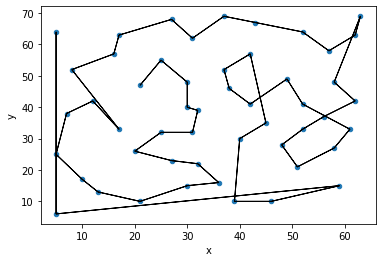

In [11]:
sim.plot_solution()

In [12]:
res = sim.run_sim()

temperature: 10
times lowered: 24
times raised:29
temperature: 9.7
times lowered: 31
times raised:31
temperature: 9.408999999999999
times lowered: 24
times raised:27
temperature: 9.126729999999998
times lowered: 27
times raised:29
temperature: 8.852928099999998
times lowered: 34
times raised:34
temperature: 8.587340256999997
times lowered: 35
times raised:26
temperature: 8.329720049289998
times lowered: 26
times raised:33
temperature: 8.079828447811298
times lowered: 30
times raised:34
temperature: 7.837433594376959
times lowered: 23
times raised:28
temperature: 7.60231058654565
times lowered: 22
times raised:26
temperature: 7.374241268949281
times lowered: 32
times raised:30
temperature: 7.153014030880803
times lowered: 25
times raised:25
temperature: 6.938423609954378
times lowered: 16
times raised:23
temperature: 6.7302709016557465
times lowered: 23
times raised:22
temperature: 6.528362774606074
times lowered: 23
times raised:25
temperature: 6.332511891367892
times lowered: 18
times

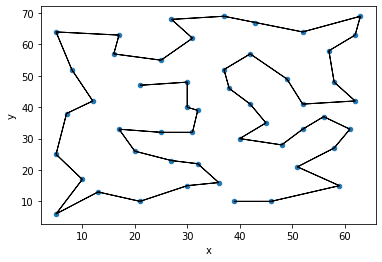

In [13]:
sim.plot_solution()

In [14]:
sim.total_distance()

415.9911025836377

In [15]:
num_sims = 10
results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 2, temp=i*10, stopK=.01, alpha = 0.99, element="2opt")
                                      for i in range(num_sims))

In [16]:
best_solution = []
best = 1000000
for i in range(len(results_sims)):
    for j in range(len(results_sims[i])):
        distance = total_distance(results_sims[i][j], df)
        if distance < best:
            # update shortest distance
            best = distance
            # store best solution
            best_solution = results_sims[i][j]
            
        # print(total_distance(results_sims[i][j], df))

print(total_distance(best_solution, df))

572.0285100192485


In [17]:
print(best_solution)

['25', '14', '6', '48', '27', '51', '46', '12', '47', '4', '17', '37', '15', '44', '42', '19', '41', '13', '18', '24', '23', '7', '26', '8', '31', '28', '3', '20', '35', '36', '29', '21', '50', '9', '49', '10', '30', '34', '16', '2', '11', '32', '1', '22', '38', '5', '45', '33', '39', '40', '43']


In [18]:
df = pd.read_csv("data/eil51.opt.tour.txt", skiprows=5, names=["cities"], header=None, delimiter = ' ', index_col=0).drop("EOF")
# df = pd.read_csv("data/a280.opt.tour.txt", skiprows=5, names=["cities"], header=None, delimiter = ' ', index_col=0).drop("EOF")
opt_tour = []
for index, row in df.iterrows():
    opt_tour.append(index)
opt_tour.pop()
print(opt_tour)


df = pd.read_csv("data/eil51.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = ' ', index_col=0).drop("EOF")
# df = pd.read_csv("data/a280.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = ' ', index_col=0).drop("EOF")
print(total_distance(opt_tour, df))


['1', '22', '8', '26', '31', '28', '3', '36', '35', '20', '2', '29', '21', '16', '50', '34', '30', '9', '49', '10', '39', '33', '45', '15', '44', '42', '40', '19', '41', '13', '25', '14', '24', '43', '7', '23', '48', '6', '27', '51', '46', '12', '47', '18', '4', '17', '37', '5', '38', '11', '32']
429.98331198338406


In [19]:
# num_sims = 8
# results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 10, temp=i, stopK=.1, element="2opt")
#                                       for i in range(num_sims))

In [20]:
# total_distance(results_sims[0][0], df)

In [21]:
# for i in range(len(results_sims)):
#     for j in range(len(results_sims[i])):
#         print(total_distance(results_sims[i][j], df))

In [22]:
# num_sims = 8
# results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 10, temp=i*10, stopK=.1, alpha = 0.9, element="insert")
#                                       for i in range(num_sims))

In [23]:
# for i in range(len(results_sims)):
#     for j in range(len(results_sims[i])):
#         print(total_distance(results_sims[i][j], df))

In [24]:
# num_sims = 8
# results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 1, temp=i*10, stopK=.01, alpha = 0.99, element="insert")
#                                       for i in range(num_sims))

In [25]:
# best_solution:
# for i in range(len(results_sims)):
#     for j in range(len(results_sims[i])):
#         print(total_distance(results_sims[i][j], df))